# A Hybrid Approach of Time Series Prediction and Natural Language Processing to Predict Cryptocurrency Value

## Project description:  
The goal of this project was to train a model which is able to classify if the value of specific cryptocurrency would rise or decline in the next day which it can lead to a rational decision for buying or selling that crypto. 
We were looking for a hybrid approach of Time series and NLP to predict the value. First through a sentiment analysis of specific tweets, we evaluated how negative and positive contents have impacted the price on a specific day and then we extracted a "sentiment score" from the model. We added this new feature to our dataset which already contain following features: 

*   High
*   Low
*   Open
*   Close
*   Volume
*   Adj Close

Finally through a Neural Network model, we trained our data to predict if the price would go up or down in the next 24 hours. 

For this model we used Historical Data of Bitcoin but it can be replaced by anyother Cryptocurrency. The result of the model was not very satisfying first because of the volatile nature of Cryptocurrency market which makes the prediction a very hard task, and second due to Data limitation. Twitter's API was allowing us just to download limited number of tweets. So for a better result, we used a dataset from kaggle which contained about 58000 Tweets. 
This dataset was serving our needs but still has a shortcoming. It was covering a short period of time which did not match the other Dataset. 

Since this project was just for learning purposes, we tried to focused more on making a correct model. The architecture of the model is correct and with a proper dataset for tweets, the result will improve. 


##Project Repo:
https://github.com/anitasafi/Cryptocurrency_Price_Prediction


##Participants:
Anita Safi, Rakeshwer Rakeshwer, Awais Khan Malik


##Course and Semester:
Machine Learning With TensorFlow/SoSe2021

# Sentiment Analysis of Tweets and Sentiment Scores

For this section, a Dataset with 58000 tweets from Kaggle have been used. The Data have been first preprocessed and labled with "Positive" and "Negative". Then a sentiment analyser have been applied, which corresponds a numeric value to a given sentiment. 



In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import time
import string
import warnings

# for all NLP related operations on text
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.classify import NaiveBayesClassifier
from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

import tweepy
from tweepy import OAuthHandler 

# To identify the sentiment of text
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob.np_extractors import ConllExtractor


# ignoring all the warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# downloading stopwords corpus
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('conll2000')
nltk.download('brown')
stopwords = set(stopwords.words("english"))


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


In [ ]:
df1 = pd.read_csv("Bitcoin_tweets.csv")

C:\Users\rakes\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (5,6,7,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df1= df1.dropna()
import datetime 

In [ ]:
# create function for sentiment analysis

def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'


In [ ]:
df1.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False
5,ZerrBenz™ ⚔ ✪ 20732,"Bkk, Thailand",I'm a cat slave 🐱 Interested in Blockchain · T...,2010-01-12 07:00:04,742.0,716,2444,False,2021-02-10 23:53:30,💹 Trade #Crypto on #Binance \n\n📌 Enjoy #Cashb...,"['Crypto', 'Binance', 'Cashback']",Twitter Web App,False
6,Bitcoin-Bot,"Florida, USA",Bot to generate Bitcoin picture as combination...,2019-12-23 16:49:16,131.0,84,5728,False,2021-02-10 23:53:17,&lt;'fire' &amp; 'man'&gt;\n#Bitcoin #Crypto #...,"['Bitcoin', 'Crypto', 'BTC']",BTC_p_bot,False
9,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:52:08,.@Tesla’s #bitcoin investment is revolutionary...,"['bitcoin', 'crypto']",Twitter Web App,False


In [ ]:
print(type(df1['date'][0]))
f_dates = []

for i in df1.date:
    date_time_str = i
    date_time_obj = datetime.datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S')
    dates = date_time_obj.date()
    f_dates.append(dates)



<class 'str'>


In [ ]:
#df1['date'] = f_dates
df1.date.head()

0    2021-02-10 23:59:04
4    2021-02-10 23:54:06
5    2021-02-10 23:53:30
6    2021-02-10 23:53:17
9    2021-02-10 23:52:08
Name: date, dtype: object

In [ ]:
df1.text.head()


0    Blue Ridge Bank shares halted by NYSE after #b...
4    This network is secured by 9 508 nodes as of t...
5    💹 Trade #Crypto on #Binance \n\n📌 Enjoy #Cashb...
6    &lt;'fire' &amp; 'man'&gt;\n#Bitcoin #Crypto #...
9    .@Tesla’s #bitcoin investment is revolutionary...
Name: text, dtype: object

In [ ]:
sentiments_using_SIA = df1.text.apply(lambda tweet: fetch_sentiment_using_SIA(tweet))
v_counts  = pd.DataFrame(sentiments_using_SIA.value_counts())
v_counts


,text
pos,50226
neg,7699


In [ ]:
df1['sentiment'] = sentiments_using_SIA
df1.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,sentiment
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False,pos
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False,pos
5,ZerrBenz™ ⚔ ✪ 20732,"Bkk, Thailand",I'm a cat slave 🐱 Interested in Blockchain · T...,2010-01-12 07:00:04,742.0,716,2444,False,2021-02-10 23:53:30,💹 Trade #Crypto on #Binance \n\n📌 Enjoy #Cashb...,"['Crypto', 'Binance', 'Cashback']",Twitter Web App,False,pos
6,Bitcoin-Bot,"Florida, USA",Bot to generate Bitcoin picture as combination...,2019-12-23 16:49:16,131.0,84,5728,False,2021-02-10 23:53:17,&lt;'fire' &amp; 'man'&gt;\n#Bitcoin #Crypto #...,"['Bitcoin', 'Crypto', 'BTC']",BTC_p_bot,False,pos
9,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:52:08,.@Tesla’s #bitcoin investment is revolutionary...,"['bitcoin', 'crypto']",Twitter Web App,False,pos


In [ ]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text 

In [ ]:
# We are keeping cleaned tweets in a new column called 'tidy_tweets'
df1['tidy_tweets'] = np.vectorize(remove_pattern)(df1['text'], "@[\w]*: | *RT*")
df1.head(10)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,sentiment,tidy_tweets
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False,pos,Blueidge Bank shares halted by NYSE after #bit...
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False,pos,This network is secured by 9 508 nodes as of t...
5,ZerrBenz™ ⚔ ✪ 20732,"Bkk, Thailand",I'm a cat slave 🐱 Interested in Blockchain · T...,2010-01-12 07:00:04,742.0,716,2444,False,2021-02-10 23:53:30,💹 Trade #Crypto on #Binance \n\n📌 Enjoy #Cashb...,"['Crypto', 'Binance', 'Cashback']",Twitter Web App,False,pos,💹 Trade #Crypto on #Binance \n\n📌 Enjoy #Cashb...
6,Bitcoin-Bot,"Florida, USA",Bot to generate Bitcoin picture as combination...,2019-12-23 16:49:16,131.0,84,5728,False,2021-02-10 23:53:17,&lt;'fire' &amp; 'man'&gt;\n#Bitcoin #Crypto #...,"['Bitcoin', 'Crypto', 'BTC']",BTC_p_bot,False,pos,&lt;'fire' &amp; 'man'&gt;\n#Bitcoin #Crypto #...
9,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:52:08,.@Tesla’s #bitcoin investment is revolutionary...,"['bitcoin', 'crypto']",Twitter Web App,False,pos,.@Tesla’s #bitcoin investment is revolutionary...
10,@massumeh18 #RefinedWarrior #Activist,NOVA,Persistent. to the extreme... #FREEPALESTINE #...,2009-01-05 13:28:47,1159.0,2185,30852,False,2021-02-10 23:52:04,Annnd #btc #Bitcoin is headed even higher now....,"['btc', 'Bitcoin']",Twitter Web App,False,pos,Annnd #btc #Bitcoin is headed even higher now....
13,One Perspective,Market Place,It's all a market of markets.\n\nPast performa...,2018-01-09 21:49:45,668.0,1097,6853,False,2021-02-10 23:50:30,#Bitcoin #BTC $BTC $GBTC $RIOT $MARA $ETH $ETH...,"['Bitcoin', 'BTC', 'AAVE', 'DeFi', 'Crypto', '...",Twitter for Android,False,pos,#Bitcoin #BTC $BTC $GBTC $IOT $MAA $ETH $ETHE ...
14,CryptoSquawk,Australia,24x7 Crypto market real-time audio squawk for ...,2017-10-05 10:13:09,1281.0,25,72,False,2021-02-10 23:50:02,⬆️⬆️ $BTC BUYING PRESSURE ALERT 📈 Price tradin...,"['Bitcoin', 'crypto', 'BTC']",CryptoSquawkBot,False,pos,⬆️⬆️ $BTC BUYING PESSUE ALET 📈 Price trading a...
15,$MOON,Moon,#Bitcoin,2010-07-12 09:07:42,4.0,32,139,False,2021-02-10 23:48:38,Buy #Bitcoin with 5% LIFETIME cashback on fees...,"['Bitcoin', 'cryptocurrency']",Twitter Web App,False,pos,Buy #Bitcoin with 5% LIFETIME cashback on fees...
18,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:47:13,#Bitcoin institutional demand accelerates in 2...,"['Bitcoin', 'BTC', 'crypto', 'cryptocurrency']",Twitter Web App,False,neg,#Bitcoin institutional demand accelerates in 2...


In [ ]:
cleaned_tweets = []

for index, row in df1.iterrows():
    # Here we are filtering out all the words that contains link
    words_without_links = [word for word in row.tidy_tweets.split() if 'http' not in word]
    cleaned_tweets.append(' '.join(words_without_links))

df1['tidy_tweets'] = cleaned_tweets
df1.head(10)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,sentiment,tidy_tweets
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False,pos,Blueidge Bank shares halted by NYSE after #bit...
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False,pos,This network is secured by 9 508 nodes as of t...
5,ZerrBenz™ ⚔ ✪ 20732,"Bkk, Thailand",I'm a cat slave 🐱 Interested in Blockchain · T...,2010-01-12 07:00:04,742.0,716,2444,False,2021-02-10 23:53:30,💹 Trade #Crypto on #Binance \n\n📌 Enjoy #Cashb...,"['Crypto', 'Binance', 'Cashback']",Twitter Web App,False,pos,💹 Trade #Crypto on #Binance 📌 Enjoy #Cashback ...
6,Bitcoin-Bot,"Florida, USA",Bot to generate Bitcoin picture as combination...,2019-12-23 16:49:16,131.0,84,5728,False,2021-02-10 23:53:17,&lt;'fire' &amp; 'man'&gt;\n#Bitcoin #Crypto #...,"['Bitcoin', 'Crypto', 'BTC']",BTC_p_bot,False,pos,&lt;'fire' &amp; 'man'&gt; #Bitcoin #Crypto #BTC
9,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:52:08,.@Tesla’s #bitcoin investment is revolutionary...,"['bitcoin', 'crypto']",Twitter Web App,False,pos,.@Tesla’s #bitcoin investment is revolutionary...
10,@massumeh18 #RefinedWarrior #Activist,NOVA,Persistent. to the extreme... #FREEPALESTINE #...,2009-01-05 13:28:47,1159.0,2185,30852,False,2021-02-10 23:52:04,Annnd #btc #Bitcoin is headed even higher now....,"['btc', 'Bitcoin']",Twitter Web App,False,pos,Annnd #btc #Bitcoin is headed even higher now...
13,One Perspective,Market Place,It's all a market of markets.\n\nPast performa...,2018-01-09 21:49:45,668.0,1097,6853,False,2021-02-10 23:50:30,#Bitcoin #BTC $BTC $GBTC $RIOT $MARA $ETH $ETH...,"['Bitcoin', 'BTC', 'AAVE', 'DeFi', 'Crypto', '...",Twitter for Android,False,pos,#Bitcoin #BTC $BTC $GBTC $IOT $MAA $ETH $ETHE ...
14,CryptoSquawk,Australia,24x7 Crypto market real-time audio squawk for ...,2017-10-05 10:13:09,1281.0,25,72,False,2021-02-10 23:50:02,⬆️⬆️ $BTC BUYING PRESSURE ALERT 📈 Price tradin...,"['Bitcoin', 'crypto', 'BTC']",CryptoSquawkBot,False,pos,⬆️⬆️ $BTC BUYING PESSUE ALET 📈 Price trading a...
15,$MOON,Moon,#Bitcoin,2010-07-12 09:07:42,4.0,32,139,False,2021-02-10 23:48:38,Buy #Bitcoin with 5% LIFETIME cashback on fees...,"['Bitcoin', 'cryptocurrency']",Twitter Web App,False,pos,Buy #Bitcoin with 5% LIFETIME cashback on fees...
18,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:47:13,#Bitcoin institutional demand accelerates in 2...,"['Bitcoin', 'BTC', 'crypto', 'cryptocurrency']",Twitter Web App,False,neg,#Bitcoin institutional demand accelerates in 2...


In [ ]:
df1 = df1[df1['tidy_tweets']!='']
df1.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,sentiment,tidy_tweets,absolute_tidy_tweets
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False,pos,Blueidge Bank shares halted by NYSE after #bit...,Blueidge Bank share halted NYSE ATM announceme...
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False,pos,This network is secured by 9 508 nodes as of t...,Teslas investment revolutionary firm may yet J...
5,ZerrBenz™ ⚔ ✪ 20732,"Bkk, Thailand",I'm a cat slave 🐱 Interested in Blockchain · T...,2010-01-12 07:00:04,742.0,716,2444,False,2021-02-10 23:53:30,💹 Trade #Crypto on #Binance \n\n📌 Enjoy #Cashb...,"['Crypto', 'Binance', 'Cashback']",Twitter Web App,False,pos,💹 Trade #Crypto on #Binance 📌 Enjoy #Cashback ...,Annnd headed even higher
6,Bitcoin-Bot,"Florida, USA",Bot to generate Bitcoin picture as combination...,2019-12-23 16:49:16,131.0,84,5728,False,2021-02-10 23:53:17,&lt;'fire' &amp; 'man'&gt;\n#Bitcoin #Crypto #...,"['Bitcoin', 'Crypto', 'BTC']",BTC_p_bot,False,pos,&lt;'fire' &amp; 'man'&gt; #Bitcoin #Crypto #BTC,BTC GBTC IOT MAA ETH ETHE AAVE COMP CGLD GT XLM
9,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:52:08,.@Tesla’s #bitcoin investment is revolutionary...,"['bitcoin', 'crypto']",Twitter Web App,False,pos,.@Tesla’s #bitcoin investment is revolutionary...,institutional demand accelerates say Grayscale...


In [ ]:
df1.drop_duplicates(subset=['tidy_tweets'], keep=False)
df1.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,sentiment,tidy_tweets,absolute_tidy_tweets
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False,pos,Blueidge Bank shares halted by NYSE after #bit...,Blueidge Bank share halted NYSE ATM announceme...
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False,pos,This network is secured by 9 508 nodes as of t...,Teslas investment revolutionary firm may yet J...
5,ZerrBenz™ ⚔ ✪ 20732,"Bkk, Thailand",I'm a cat slave 🐱 Interested in Blockchain · T...,2010-01-12 07:00:04,742.0,716,2444,False,2021-02-10 23:53:30,💹 Trade #Crypto on #Binance \n\n📌 Enjoy #Cashb...,"['Crypto', 'Binance', 'Cashback']",Twitter Web App,False,pos,💹 Trade #Crypto on #Binance 📌 Enjoy #Cashback ...,Annnd headed even higher
6,Bitcoin-Bot,"Florida, USA",Bot to generate Bitcoin picture as combination...,2019-12-23 16:49:16,131.0,84,5728,False,2021-02-10 23:53:17,&lt;'fire' &amp; 'man'&gt;\n#Bitcoin #Crypto #...,"['Bitcoin', 'Crypto', 'BTC']",BTC_p_bot,False,pos,&lt;'fire' &amp; 'man'&gt; #Bitcoin #Crypto #BTC,BTC GBTC IOT MAA ETH ETHE AAVE COMP CGLD GT XLM
9,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:52:08,.@Tesla’s #bitcoin investment is revolutionary...,"['bitcoin', 'crypto']",Twitter Web App,False,pos,.@Tesla’s #bitcoin investment is revolutionary...,institutional demand accelerates say Grayscale...


In [ ]:
df1['absolute_tidy_tweets'] = df1['tidy_tweets'].str.replace("[^a-zA-Z# ]", "")

In [ ]:
stopwords_set = set(stopwords)
cleaned_tweets = []

for index, row in df1.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.absolute_tidy_tweets.split() if not word in stopwords_set and '#' not in word.lower()]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_tweets.append(' '.join(words_without_stopwords))
    
df1['absolute_tidy_tweets'] = cleaned_tweets
df1.head(10)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,sentiment,tidy_tweets,absolute_tidy_tweets
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False,pos,Blueidge Bank shares halted by NYSE after #bit...,Blueidge Bank shares halted NYSE ATM announcem...
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False,pos,This network is secured by 9 508 nodes as of t...,This network secured nodes today Soon biggest ...
5,ZerrBenz™ ⚔ ✪ 20732,"Bkk, Thailand",I'm a cat slave 🐱 Interested in Blockchain · T...,2010-01-12 07:00:04,742.0,716,2444,False,2021-02-10 23:53:30,💹 Trade #Crypto on #Binance \n\n📌 Enjoy #Cashb...,"['Crypto', 'Binance', 'Cashback']",Twitter Web App,False,pos,💹 Trade #Crypto on #Binance 📌 Enjoy #Cashback ...,Trade Enjoy Trading fee Sign link
6,Bitcoin-Bot,"Florida, USA",Bot to generate Bitcoin picture as combination...,2019-12-23 16:49:16,131.0,84,5728,False,2021-02-10 23:53:17,&lt;'fire' &amp; 'man'&gt;\n#Bitcoin #Crypto #...,"['Bitcoin', 'Crypto', 'BTC']",BTC_p_bot,False,pos,&lt;'fire' &amp; 'man'&gt; #Bitcoin #Crypto #BTC,ltfire amp mangt
9,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:52:08,.@Tesla’s #bitcoin investment is revolutionary...,"['bitcoin', 'crypto']",Twitter Web App,False,pos,.@Tesla’s #bitcoin investment is revolutionary...,Teslas investment revolutionary firms may yet ...
10,@massumeh18 #RefinedWarrior #Activist,NOVA,Persistent. to the extreme... #FREEPALESTINE #...,2009-01-05 13:28:47,1159.0,2185,30852,False,2021-02-10 23:52:04,Annnd #btc #Bitcoin is headed even higher now....,"['btc', 'Bitcoin']",Twitter Web App,False,pos,Annnd #btc #Bitcoin is headed even higher now...,Annnd headed even higher
13,One Perspective,Market Place,It's all a market of markets.\n\nPast performa...,2018-01-09 21:49:45,668.0,1097,6853,False,2021-02-10 23:50:30,#Bitcoin #BTC $BTC $GBTC $RIOT $MARA $ETH $ETH...,"['Bitcoin', 'BTC', 'AAVE', 'DeFi', 'Crypto', '...",Twitter for Android,False,pos,#Bitcoin #BTC $BTC $GBTC $IOT $MAA $ETH $ETHE ...,BTC GBTC IOT MAA ETH ETHE AAVE COMP CGLD GT XLM
14,CryptoSquawk,Australia,24x7 Crypto market real-time audio squawk for ...,2017-10-05 10:13:09,1281.0,25,72,False,2021-02-10 23:50:02,⬆️⬆️ $BTC BUYING PRESSURE ALERT 📈 Price tradin...,"['Bitcoin', 'crypto', 'BTC']",CryptoSquawkBot,False,pos,⬆️⬆️ $BTC BUYING PESSUE ALET 📈 Price trading a...,BTC BUYING PESSUE ALET Price trading around
15,$MOON,Moon,#Bitcoin,2010-07-12 09:07:42,4.0,32,139,False,2021-02-10 23:48:38,Buy #Bitcoin with 5% LIFETIME cashback on fees...,"['Bitcoin', 'cryptocurrency']",Twitter Web App,False,pos,Buy #Bitcoin with 5% LIFETIME cashback on fees...,Buy LIFETIME cashback fees largest exchange link
18,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:47:13,#Bitcoin institutional demand accelerates in 2...,"['Bitcoin', 'BTC', 'crypto', 'cryptocurrency']",Twitter Web App,False,neg,#Bitcoin institutional demand accelerates in 2...,institutional demand accelerates says Grayscal...


In [ ]:
#Tokenizing the tweets
tokenized_tweet = df1['absolute_tidy_tweets'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [Blueidge, Bank, shares, halted, NYSE, ATM, an...
4    [This, network, secured, nodes, today, Soon, b...
5             [Trade, Enjoy, Trading, fee, Sign, link]
6                                 [ltfire, amp, mangt]
9    [Teslas, investment, revolutionary, firms, may...
Name: absolute_tidy_tweets, dtype: object

In [ ]:
#Lemmatizer tokenizing
word_lemmatizer = WordNetLemmatizer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [word_lemmatizer.lemmatize(i) for i in x])
tokenized_tweet.head()

0    [Blueidge, Bank, share, halted, NYSE, ATM, ann...
4    [This, network, secured, node, today, Soon, bi...
5             [Trade, Enjoy, Trading, fee, Sign, link]
6                                 [ltfire, amp, mangt]
9    [Teslas, investment, revolutionary, firm, may,...
Name: absolute_tidy_tweets, dtype: object

In [ ]:
#Adding new column of cleaned Data
for i, tokens in enumerate(tokenized_tweet):
    tokenized_tweet[i] = ' '.join(tokens)

df1['absolute_tidy_tweets'] = tokenized_tweet
df1.head(10)


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,sentiment,tidy_tweets,absolute_tidy_tweets
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False,pos,Blueidge Bank shares halted by NYSE after #bit...,Blueidge Bank share halted NYSE ATM announceme...
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False,pos,This network is secured by 9 508 nodes as of t...,Teslas investment revolutionary firm may yet J...
5,ZerrBenz™ ⚔ ✪ 20732,"Bkk, Thailand",I'm a cat slave 🐱 Interested in Blockchain · T...,2010-01-12 07:00:04,742.0,716,2444,False,2021-02-10 23:53:30,💹 Trade #Crypto on #Binance \n\n📌 Enjoy #Cashb...,"['Crypto', 'Binance', 'Cashback']",Twitter Web App,False,pos,💹 Trade #Crypto on #Binance 📌 Enjoy #Cashback ...,Annnd headed even higher
6,Bitcoin-Bot,"Florida, USA",Bot to generate Bitcoin picture as combination...,2019-12-23 16:49:16,131.0,84,5728,False,2021-02-10 23:53:17,&lt;'fire' &amp; 'man'&gt;\n#Bitcoin #Crypto #...,"['Bitcoin', 'Crypto', 'BTC']",BTC_p_bot,False,pos,&lt;'fire' &amp; 'man'&gt; #Bitcoin #Crypto #BTC,BTC GBTC IOT MAA ETH ETHE AAVE COMP CGLD GT XLM
9,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:52:08,.@Tesla’s #bitcoin investment is revolutionary...,"['bitcoin', 'crypto']",Twitter Web App,False,pos,.@Tesla’s #bitcoin investment is revolutionary...,institutional demand accelerates say Grayscale...
10,@massumeh18 #RefinedWarrior #Activist,NOVA,Persistent. to the extreme... #FREEPALESTINE #...,2009-01-05 13:28:47,1159.0,2185,30852,False,2021-02-10 23:52:04,Annnd #btc #Bitcoin is headed even higher now....,"['btc', 'Bitcoin']",Twitter Web App,False,pos,Annnd #btc #Bitcoin is headed even higher now...,Forget know These coin listed ETF These real one
13,One Perspective,Market Place,It's all a market of markets.\n\nPast performa...,2018-01-09 21:49:45,668.0,1097,6853,False,2021-02-10 23:50:30,#Bitcoin #BTC $BTC $GBTC $RIOT $MARA $ETH $ETH...,"['Bitcoin', 'BTC', 'AAVE', 'DeFi', 'Crypto', '...",Twitter for Android,False,pos,#Bitcoin #BTC $BTC $GBTC $IOT $MAA $ETH $ETHE ...,Mastercard Will Let Merchants Accept Payments ...
14,CryptoSquawk,Australia,24x7 Crypto market real-time audio squawk for ...,2017-10-05 10:13:09,1281.0,25,72,False,2021-02-10 23:50:02,⬆️⬆️ $BTC BUYING PRESSURE ALERT 📈 Price tradin...,"['Bitcoin', 'crypto', 'BTC']",CryptoSquawkBot,False,pos,⬆️⬆️ $BTC BUYING PESSUE ALET 📈 Price trading a...,After Twitter considers adding balance sheet s...
15,$MOON,Moon,#Bitcoin,2010-07-12 09:07:42,4.0,32,139,False,2021-02-10 23:48:38,Buy #Bitcoin with 5% LIFETIME cashback on fees...,"['Bitcoin', 'cryptocurrency']",Twitter Web App,False,pos,Buy #Bitcoin with 5% LIFETIME cashback on fees...,H consolidating support k resistance k Stop lo...
18,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:47:13,#Bitcoin institutional demand accelerates in 2...,"['Bitcoin', 'BTC', 'crypto', 'cryptocurrency']",Twitter Web App,False,neg,#Bitcoin institutional demand accelerates in 2...,Upfront Personal Episode Blockchain cryptocurr...


In [ ]:
df1.absolute_tidy_tweets[0]

'Blueidge Bank share halted NYSE ATM announcement MyBlueidgeBank'

In [ ]:
#Decoding 
df1.absolute_tidy_tweets = pd.DataFrame(df1.absolute_tidy_tweets.str.decode('utf-8'))


In [ ]:
df1.absolute_tidy_tweets

0         Blueidge Bank share halted NYSE ATM announceme...
4         Teslas investment revolutionary firm may yet J...
5                                  Annnd headed even higher
6           BTC GBTC IOT MAA ETH ETHE AAVE COMP CGLD GT XLM
9         institutional demand accelerates say Grayscale...
                                ...                        
128415    ['LIVE', 'Dollar', 'Bitcoin', 'Ethereum', 'Tra...
128416    ['Did', 'someone', 'tweet', 'something', 'stup...
128417    ['Buying', 'high', 'cap', 'stoploss', 'amp', '...
128420    ['Check', 'latest', 'Blockchain', 'Bitcoin', '...
128425    ['INCEASED', 'LIQUIDITY', 'BTC', 'traded', 'far']
Name: absolute_tidy_tweets, Length: 57925, dtype: object

In [ ]:
#cleaned_dataframe_count
sentiments_using_SIA2 = df1.absolute_tidy_tweets.apply(lambda tweet: fetch_sentiment_using_SIA(tweet))  # axis = 1
cleaned_dataframe_count = pd.DataFrame(sentiments_using_SIA2.value_counts())


In [ ]:
Tweets = df1[['date','sentiment']]

In [ ]:
Tweets.date 

,date,sentiment
0,2021-02-10 23:59:04,pos
4,2021-02-10 23:54:06,pos
5,2021-02-10 23:53:30,pos
6,2021-02-10 23:53:17,pos
9,2021-02-10 23:52:08,pos
...,...,...
128415,2021-05-25 10:42:28,pos
128416,2021-05-25 10:42:14,neg
128417,2021-05-25 10:42:06,pos
128420,2021-05-25 10:41:19,pos


In [ ]:
#Formating the date
f_dates = []
for i in df1.date:
    date_time_str = i
    date_time_obj = datetime.datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S')
    dates = date_time_obj.date()
    f_dates.append(dates)

In [ ]:
Tweets['date'] = f_dates

C:\Users\rakes\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
Tweets

,date,sentiment
0,2021-02-10,pos
4,2021-02-10,pos
5,2021-02-10,pos
6,2021-02-10,pos
9,2021-02-10,pos
...,...,...
128415,2021-05-25,pos
128416,2021-05-25,neg
128417,2021-05-25,pos
128420,2021-05-25,pos


#The Sequential Model

In [1]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential
import datetime as dt
import pandas_datareader as web


In [ ]:
#Scraping historical and real-time data from yahoo finance

c = 'BTC'
a = 'USD'

s = dt.datetime(2012,1,1)
e = dt.datetime.now()

data = web.DataReader(f'{c}-{a}', 'yahoo',s,e)


In [ ]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-09-16,468.174011,452.421997,465.864014,457.334015,21056800.0,457.334015
2014-09-17,456.859985,413.104004,456.859985,424.440002,34483200.0,424.440002
2014-09-18,427.834991,384.532013,424.102997,394.795990,37919700.0,394.795990
2014-09-19,423.295990,389.882996,394.673004,408.903992,36863600.0,408.903992
2014-09-20,412.425995,393.181000,408.084991,398.821014,26580100.0,398.821014


In [ ]:
data['date']= data.index

In [ ]:
data = data.reset_index()

In [ ]:
data.drop('Date', inplace= True, axis =1 )

In [ ]:
data.head()

,High,Low,Open,Close,Volume,Adj Close,date
0,468.174011,452.421997,465.864014,457.334015,21056800.0,457.334015,2014-09-16
1,456.859985,413.104004,456.859985,424.440002,34483200.0,424.440002,2014-09-17
2,427.834991,384.532013,424.102997,394.795990,37919700.0,394.795990,2014-09-18
3,423.295990,389.882996,394.673004,408.903992,36863600.0,408.903992,2014-09-19
4,412.425995,393.181000,408.084991,398.821014,26580100.0,398.821014,2014-09-20


In [ ]:
crypto = data[['date', 'Close']]

In [ ]:
data['date'] = data.date.astype('datetime64[ns]')

Tweets['date'] = Tweets.date.astype('datetime64[ns]')

C:\Users\rakes\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#Merging dataframe of historical data with dataframe with sentiments 

main = crypto.merge(Tweets, on = "date")

In [ ]:
main.head()

,date,Close,sentiment
0,2021-02-05,38144.308594,1
1,2021-02-05,38144.308594,1
2,2021-02-05,38144.308594,0
3,2021-02-05,38144.308594,1
4,2021-02-05,38144.308594,1


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

(57925,)

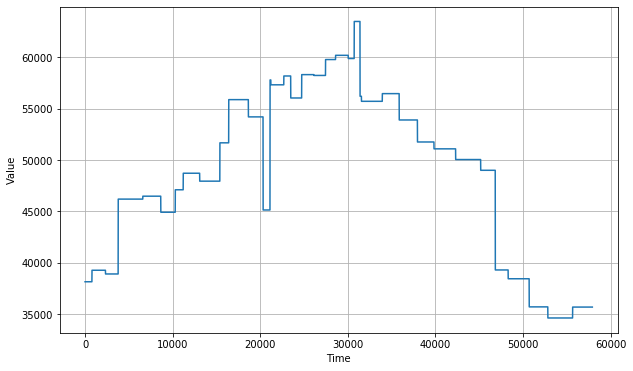

In [ ]:
temps = main.iloc[:,1]
temps.shape
#print(time)
series = np.array(temps)
time = np.array(range(0,len(temps)))
plt.figure(figsize=(10, 6))
plot_series(time, series)
series.shape

In [ ]:
main.dtypes

date         datetime64[ns]
Close               float64
sentiment             int64
dtype: object

In [ ]:
array = main.values

In [ ]:
# train and test
X= array[:,1:2] 
Y= array[:,2]

In [ ]:
X

array([[38144.30859375],
       [38144.30859375],
       [38144.30859375],
       ...,
       [35678.12890625],
       [35678.12890625],
       [35678.12890625]], dtype=object)

In [ ]:
#Data Normalization
scal = StandardScaler()
training_x = scal.fit_transform(X)

In [ ]:
#Type casting
Y= Y.astype('int')
training_x

array([[-1.311],
       [-1.311],
       [-1.311],
       ...,
       [-1.619],
       [-1.619],
       [-1.619]])

In [ ]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger

In [ ]:
#Feed Forward Neural Network with Dropout and Early-stopping

#building and training the model
X_train, X_test, y_train, y_test = train_test_split(training_x, Y, test_size=0.25)
model = Sequential()
model.add(Dense(64, input_shape=(1,)))
#model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(512, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
# early stopping for avoiding overfitting values. 
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,
                       patience=100, min_delta=0.0001, restore_best_weights = True)

history = model.fit(X_train, y_train, epochs=20,
                    validation_data= (X_test,y_test),
                              callbacks=[es])

Epoch 1/20
1358/1358 [==============================] - 4s 3ms/step - loss: 0.1322 - accuracy: 0.8522 - val_loss: 0.1169 - val_accuracy: 0.8653
Epoch 2/20
1358/1358 [==============================] - 4s 3ms/step - loss: 0.1163 - accuracy: 0.8677 - val_loss: 0.1166 - val_accuracy: 0.8653
Epoch 3/20
1358/1358 [==============================] - 3s 2ms/step - loss: 0.1156 - accuracy: 0.8677 - val_loss: 0.1165 - val_accuracy: 0.8653
Epoch 4/20
1358/1358 [==============================] - 3s 2ms/step - loss: 0.1153 - accuracy: 0.8677 - val_loss: 0.1174 - val_accuracy: 0.8653
Epoch 5/20
1358/1358 [==============================] - 3s 3ms/step - loss: 0.1152 - accuracy: 0.8677 - val_loss: 0.1171 - val_accuracy: 0.8653
Epoch 6/20
1358/1358 [==============================] - 4s 3ms/step - loss: 0.1152 - accuracy: 0.8677 - val_loss: 0.1166 - val_accuracy: 0.8653
Epoch 7/20
1358/1358 [==============================] - 4s 3ms/step - loss: 0.1152 - accuracy: 0.8677 - val_loss: 0.1172 - val_accuracy:

Model: "sequential_52"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_125 (Dense)            (None, 64)                128       
_________________________________________________________________
dropout_64 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_126 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_127 (Dense)            (None, 1)                 33        
Total params: 2,241
Trainable params: 2,241
Non-trainable params: 0
_________________________________________________________________


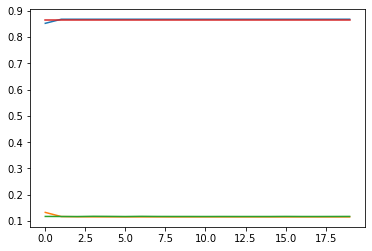

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.plot(history.history["val_accuracy"])
model.summary()

# The Sequential Model without Dropout and Early-stopping

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers


model = keras.Sequential()
x_train, x_test, y_train, y_test = train_test_split(training_x, Y, test_size=0.25)

model.add(layers.Dense(64,input_shape=(1,)))
model.add(layers.Activation('relu'))

opt = keras.optimizers.Adam(learning_rate=0.00001)
model.compile(loss='mean_squared_error', optimizer=opt)


history = model.fit(x_train, y_train, epochs=20)

Epoch 1/20
1358/1358 [==============================] - 2s 2ms/step - loss: 0.7664
Epoch 2/20
1358/1358 [==============================] - 2s 2ms/step - loss: 0.7484
Epoch 3/20
1358/1358 [==============================] - 2s 2ms/step - loss: 0.7307
Epoch 4/20
1358/1358 [==============================] - 2s 2ms/step - loss: 0.7135
Epoch 5/20
1358/1358 [==============================] - 2s 2ms/step - loss: 0.6967
Epoch 6/20
1358/1358 [==============================] - 2s 2ms/step - loss: 0.6804
Epoch 7/20
1358/1358 [==============================] - 2s 2ms/step - loss: 0.6645
Epoch 8/20
1358/1358 [==============================] - 2s 2ms/step - loss: 0.6493
Epoch 9/20
1358/1358 [==============================] - 2s 2ms/step - loss: 0.6346
Epoch 10/20
1358/1358 [==============================] - 3s 2ms/step - loss: 0.6203
Epoch 11/20
1358/1358 [==============================] - 3s 2ms/step - loss: 0.6065
Epoch 12/20
1358/1358 [==============================] - 3s 2ms/step - loss: 0.5933
E

In [ ]:
#Evaluation of the Model
model.evaluate(X_test, y_test)


453/453 [==============================] - 1s 1ms/step - loss: 0.4972


0.4971606433391571

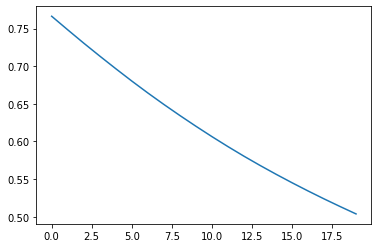

In [ ]:
plt.plot(history.history['loss'])
#plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_loss'])


This Model is converging to a lower loss and comparing to the other model, it was performing better. 

# LSTM with Sentiment Scores

In [ ]:
#creating a generator

from keras.utils import to_categorical
def generator(data, lookback, delay, min_index, max_index,
              shuffle=False, batch_size=32, step=5):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(
                min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)
        samples = np.zeros((len(rows),
                           lookback // step,
                           data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][-1]
        yield samples, to_categorical(targets)

In [ ]:
lookback = 30
step = 10
delay = 1
batch_size = 32

In [ ]:
#splitting data (via generators) into training, testing and validation sets
train_gen = generator(normalized_df1,
                      lookback=lookback,
                      delay=delay,
                      min_index=0,
                      max_index=round(0.6*len(normalized_df1)),
                      shuffle=False,
                      step=step,
                      batch_size=batch_size)
val_gen = generator(normalized_df1,
                    lookback=lookback,
                    delay=delay,
                    min_index=round(0.6*len(normalized_df1))+1,
                    max_index=round(0.8*len(normalized_df1)),
                    step=step,
                    batch_size=batch_size)
test_gen = generator(normalized_df1,
                     lookback=lookback,
                     delay=delay,
                     min_index=round(0.8*len(normalized_df1))+1,
                     max_index=None,
                     step=step,
                     batch_size=batch_size)

val_steps = (round(0.8*len(normalized_df1)) - round(0.6*len(normalized_df1))+1 - lookback) # how many steps to draw from val_gen in order to see the entire validation set
test_steps = (len(normalized_df1) - round(0.8*len(normalized_df1))+1 - lookback)
# How many steps to draw from test_gen in order to see the entire test set

In [ ]:
#creating LSTM model and training it
model = Sequential()
model.add(LSTM(100, return_sequences=True,
                    input_shape=(None, normalized_df1.shape[-1]),
                    kernel_initializer='random_uniform'))
model.add(Dropout(0.4))
model.add(LSTM(60, dropout=0.0, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(20,activation='relu'))
model.add(layers.Dense(2, activation='softmax'))
model.compile(loss='mean_squared_error', optimizer=RMSprop(),metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,
                       patience=50, min_delta=0.0001, restore_best_weights = True)

history = model.fit_generator(train_gen,
                              steps_per_epoch=2,
                              epochs=100,
                              validation_data=val_gen,
                              validation_steps=val_steps,
                              callbacks=[es])

'''es: Early stopping.. A techinique to avoid overfitting.'''

# A LSTM Model with Crypto historical and Real-time Data from Yahoo Finance

In [ ]:
import pandas as pd
import pandas_datareader as web
import datetime as dt
import numpy as np 

from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [ ]:
#Scraping historical data from yahoo finance

c = 'BTC'
a = 'USD'


s = dt.datetime(2012,1,1)
e = dt.datetime.now()

data = web.DataReader(f'{c}-{a}', 'yahoo',s,e)

In [ ]:
# Preparing the Data 

scaler = MinMaxScaler(feature_range= (0,1))

scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

prediction_days = 60 

future_days = 14

In [ ]:
#Spliting Data into train and test

x_train, y_train =[], []


for x in range(prediction_days, len(scaled_data)-future_days):

     x_train.append(scaled_data[x-prediction_days:x,0])
     y_train.append(scaled_data[x+future_days,0])
     

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))

Epoch 1/25
75/75 [==============================] - 12s 88ms/step - loss: 0.0047
Epoch 2/25
75/75 [==============================] - 7s 88ms/step - loss: 0.0034
Epoch 3/25
75/75 [==============================] - 7s 88ms/step - loss: 0.0032
Epoch 4/25
75/75 [==============================] - 7s 88ms/step - loss: 0.0028
Epoch 5/25
75/75 [==============================] - 7s 90ms/step - loss: 0.0028
Epoch 6/25
75/75 [==============================] - 7s 88ms/step - loss: 0.0026
Epoch 7/25
75/75 [==============================] - 7s 89ms/step - loss: 0.0024
Epoch 8/25
75/75 [==============================] - 7s 90ms/step - loss: 0.0023
Epoch 9/25
75/75 [==============================] - 7s 89ms/step - loss: 0.0018
Epoch 10/25
75/75 [==============================] - 7s 88ms/step - loss: 0.0025
Epoch 11/25
75/75 [==============================] - 7s 90ms/step - loss: 0.0019
Epoch 12/25
75/75 [==============================] - 7s 90ms/step - loss: 0.0020
Epoch 13/25
75/75 [=================

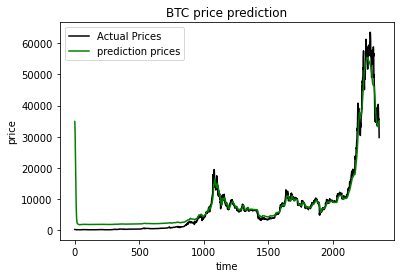

[[35255.97]]


In [ ]:

# neural network 

model =  Sequential()

model.add(LSTM(units = 50, return_sequences = True, input_shape=(x_train.shape[1],1)))

model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))

model.add(Dropout(0.2))


model.add(LSTM(units = 50))

model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer="adam", loss = 'mean_squared_error' )
model.fit(x_train, y_train, epochs= 25, batch_size=32)


# test model

test_start = dt.datetime(2015,1,1)
test_end = dt.datetime.now()

test_data = web.DataReader(f'{c}-{a}', 'yahoo',test_start,test_end)

actual_prices = test_data['Close'].values

total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)

model_inputs =   total_dataset[len(total_dataset)-len(test_data)-prediction_days:].values

model_inputs = model_inputs.reshape(-1,1)

model_inputs = scaler.fit_transform(model_inputs) 




x_test =[]

for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x,0])
    
    
x_test = np.array(x_test)

x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

prediction_prices = model.predict(x_test)

prediction_prices = scaler.inverse_transform(prediction_prices)

import matplotlib.pyplot as plt

plt.plot(actual_prices, color= 'black',label = 'Actual Prices')

plt.plot(prediction_prices, color = 'green', label = "prediction prices")

plt.title(f'{c} price prediction')

plt.xlabel("time")
plt.ylabel("price")
plt.legend(loc = "upper left")

plt.show()
                                            
   

#predict the nest day

real_data = [model_inputs[len(model_inputs)+1-prediction_days: len(model_inputs)+1,0]]

real_data = np.array(real_data)

real_data = np.reshape (real_data, (real_data.shape[0], real_data.shape[1], 1))

prediction = model.predict (real_data)

prediction= scaler.inverse_transform(prediction)

print(prediction)